# Exploratory Data Analysis of Electricity Bill dataset

# 1. Problem Statement

- This project is based electricity consumption dataset. The dataset comprises of different features related to electricity consumption and total bill is also included in the features. In this we will perform some Exploratory data analysis and try to find some insights.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('data/electricity_bill_dataset.csv',encoding='utf-8', encoding_errors='ignore')

In [7]:
data.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23,2,6,1,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22,2,3,1,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20,2,6,7,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22,3,21,1,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23,2,11,1,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [10]:
data.describe()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,MonthlyHours,TariffRate,ElectricityBill
count,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.0,45345.000000,45345.000000,45345.000000,45345.000000
mean,13.990694,21.705458,1.503959,12.502635,2.865057,0.0,6.488058,515.083207,8.369648,4311.771307
std,5.470816,1.672575,1.115482,5.756007,3.894933,0.0,3.443252,122.618017,0.576992,1073.886406
min,5.000000,17.000000,0.000000,3.000000,1.000000,0.0,1.000000,95.000000,7.400000,807.500000
25%,9.000000,22.000000,1.000000,7.000000,1.000000,0.0,3.000000,429.000000,7.900000,3556.800000
50%,14.000000,22.000000,2.000000,13.000000,1.000000,0.0,6.000000,515.000000,8.400000,4299.400000
75%,19.000000,23.000000,2.000000,17.000000,1.000000,0.0,9.000000,601.000000,8.900000,5038.800000
max,23.000000,23.000000,3.000000,22.000000,12.000000,0.0,12.000000,926.000000,9.300000,8286.300000


In [24]:
# Motor pump is all zero, so we will remove that column

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  int64  
 2   AirConditioner   45345 non-null  int64  
 3   Television       45345 non-null  int64  
 4   Monitor          45345 non-null  int64  
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.2+ MB


In [17]:
data.isnull().sum()

Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64

In [18]:
# data is clean so need for data cleaning process

In [22]:
data = data.drop(['MotorPump'], axis=1)

<Axes: >

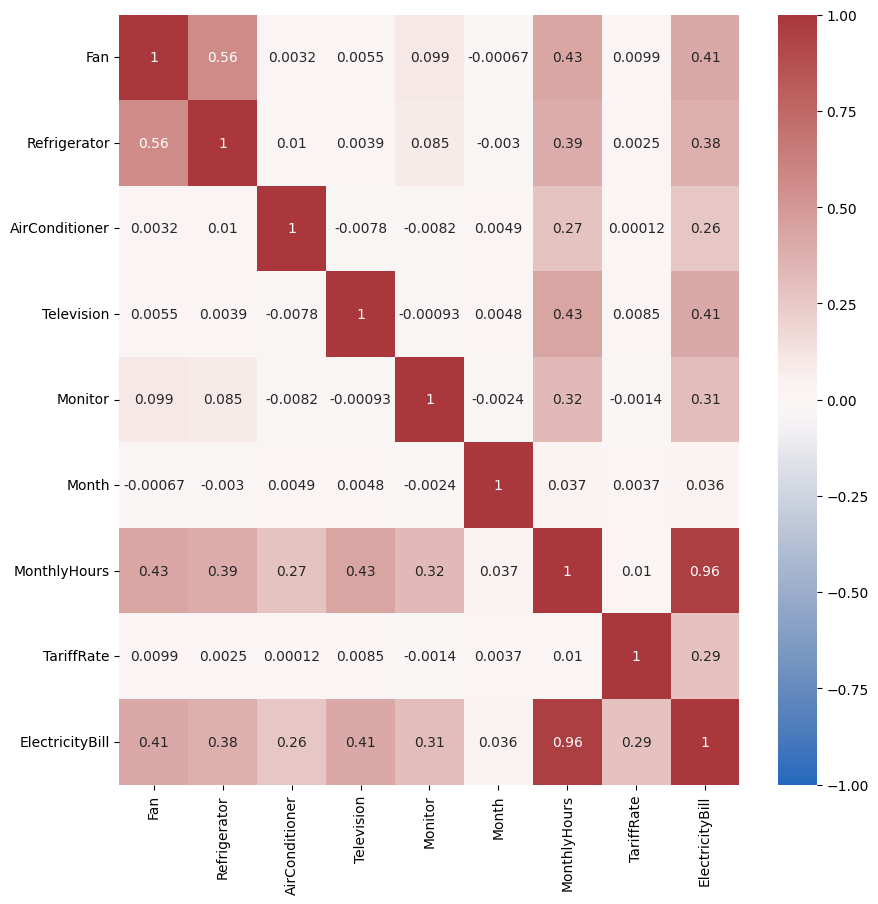

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(data = data[['Fan','Refrigerator','AirConditioner','Television','Monitor',
                        'Month','MonthlyHours','TariffRate','ElectricityBill']].corr(),
            annot = True,  cmap = "vlag", vmin = -1, vmax = 1, center = 0)

<Axes: xlabel='ElectricityBill', ylabel='Television'>

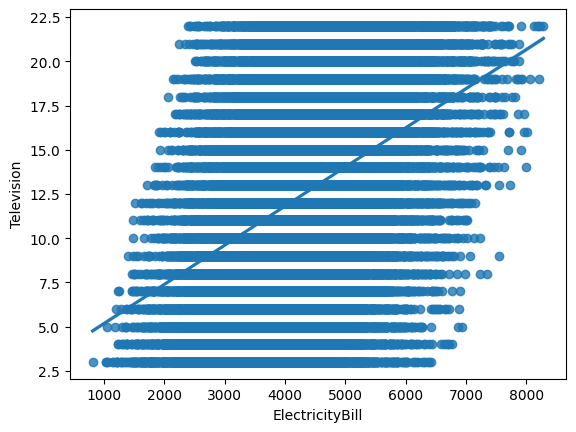

In [33]:
sns.regplot(x=data['ElectricityBill'], y=data['Television'])

<Axes: xlabel='Television', ylabel='count'>

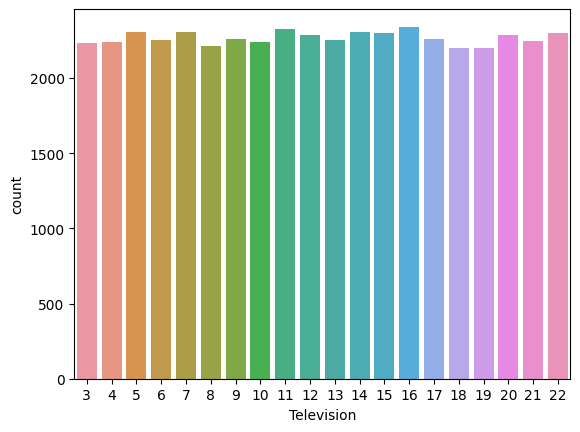

In [37]:
sns.countplot(x=data["Television"])

In [41]:
# From above count plot we can see that the count is almost same for the number of hours Television is consumed.

<Axes: xlabel='Refrigerator', ylabel='count'>

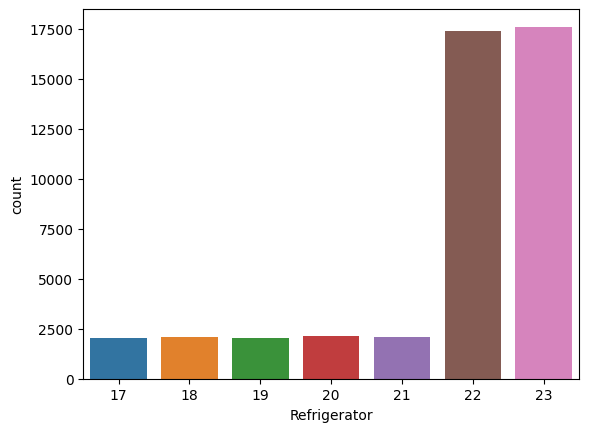

In [44]:
sns.countplot(x=data["Refrigerator"])

##### Refrigerator is mostly running continously in all households. So we can see that the count of 22 and 23 is maximum in this countplot.

In [49]:
data['City'].unique()

array(['Hyderabad', 'Vadodara', 'Shimla', 'Mumbai', 'Ratnagiri',
       'New Delhi', 'Dahej', 'Ahmedabad', 'Noida', 'Nagpur', 'Chennai',
       'Faridabad', 'Kolkata', 'Pune', 'Gurgaon', 'Navi Mumbai'],
      dtype=object)

### Plot the average monthly consumption of each city ? 

<Axes: xlabel='City'>

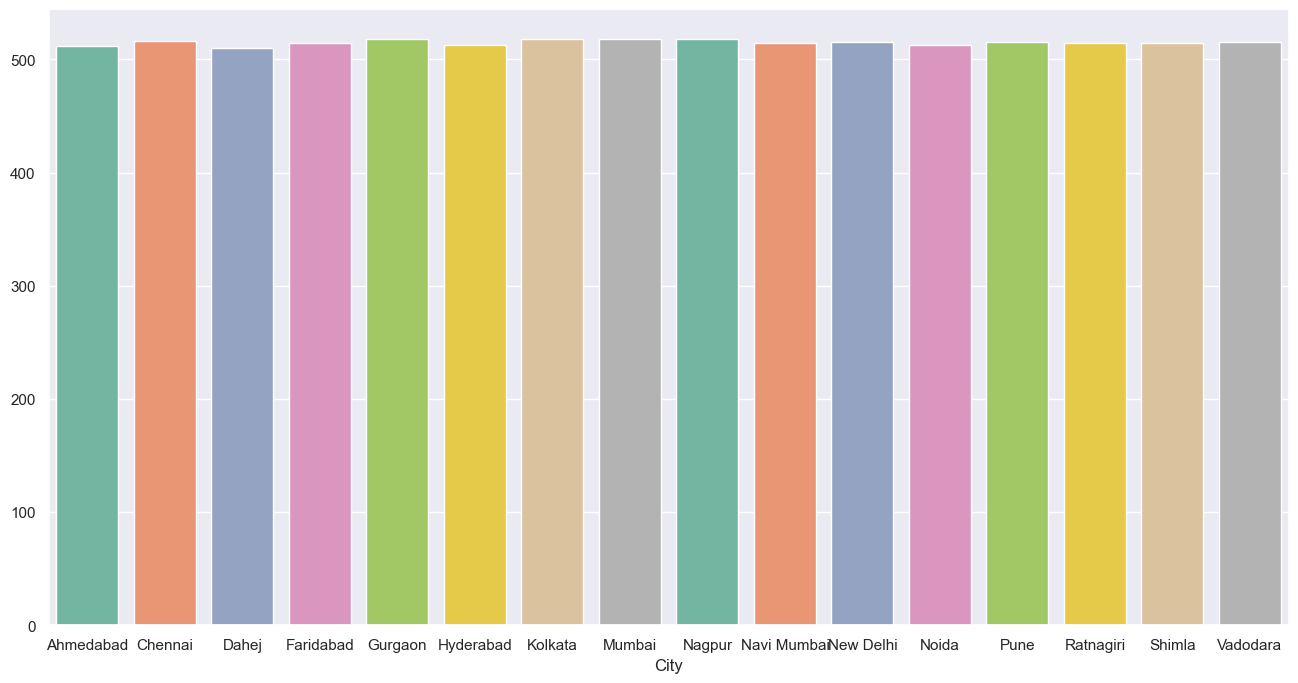

In [78]:
result_mean = data.groupby('City').MonthlyHours.mean()
sns.set(rc={"figure.figsize":(16, 8)})
sns.barplot(x=result_mean.index, y=result_mean.values, palette="Set2")

##### From the above chart we can see that the average monthly consumption of electricity of each city. The average does not have that much difference.

### Plot the total monthly consumption of each city ?

<Axes: xlabel='City'>

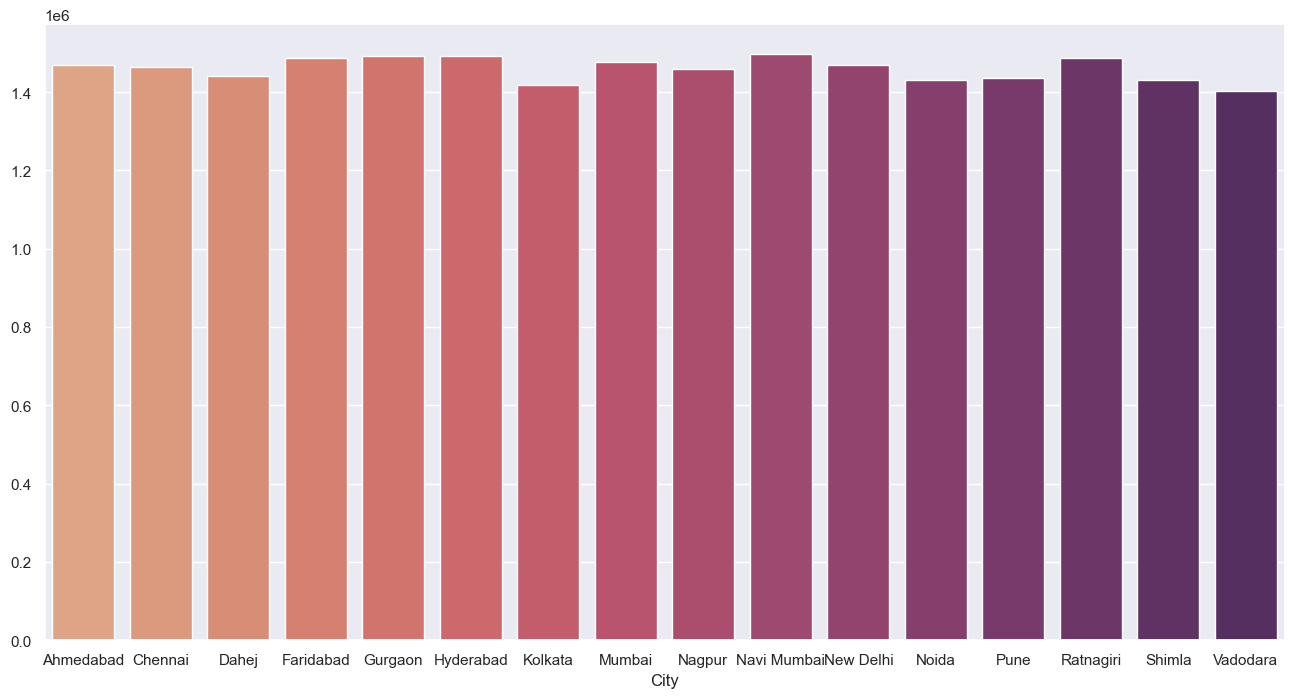

In [75]:
result_sum = data.groupby('City').MonthlyHours.sum()
sns.set(rc={"figure.figsize":(16, 8)})
sns.barplot(x=result_sum.index, y=result_sum.values, palette="flare")

##### Above chart shows the total montly consumption of each city.

### Plot the average tarrif rate of each city ?

<Axes: xlabel='City'>

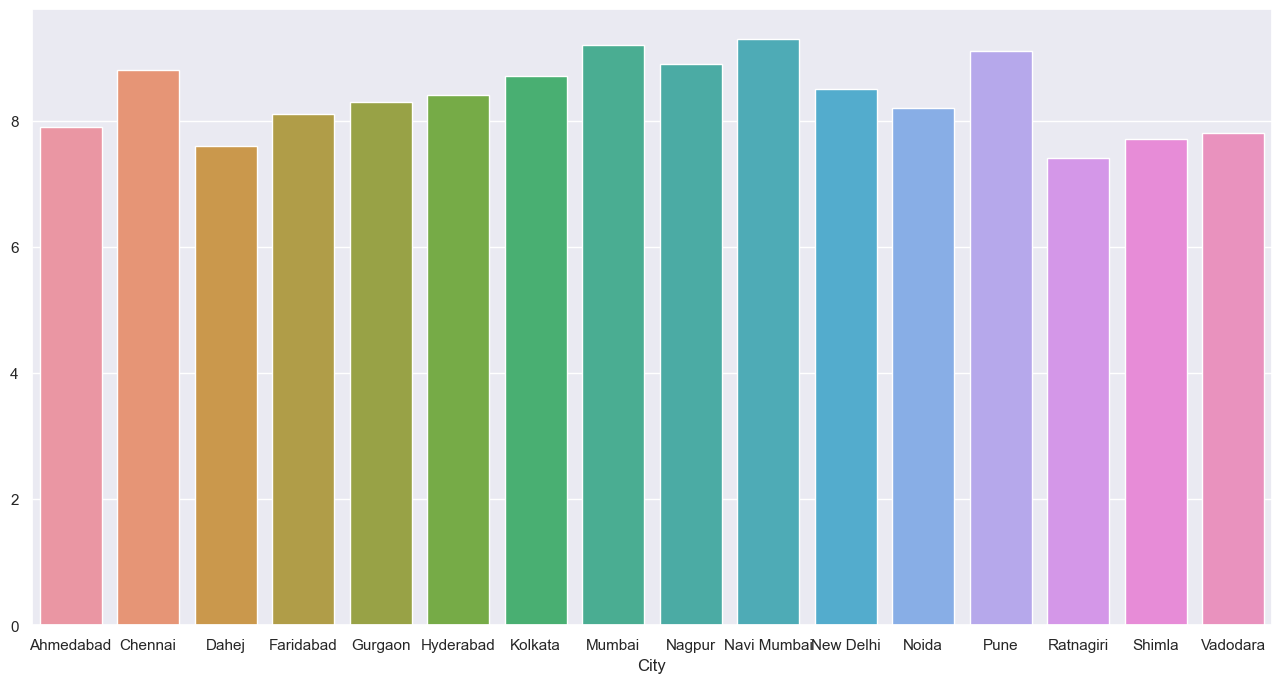

In [73]:
result_tarrif = data.groupby('City').TariffRate.mean()
sns.set(rc={"figure.figsize":(16, 8)})
sns.barplot(x=result_tarrif.index, y=result_tarrif.values)

##### From the above plot we can say that the average tarrif rate of each city is between 7 to 8 Rupees. 

### Plot the averge electricity bill of each city ?

<Axes: xlabel='City'>

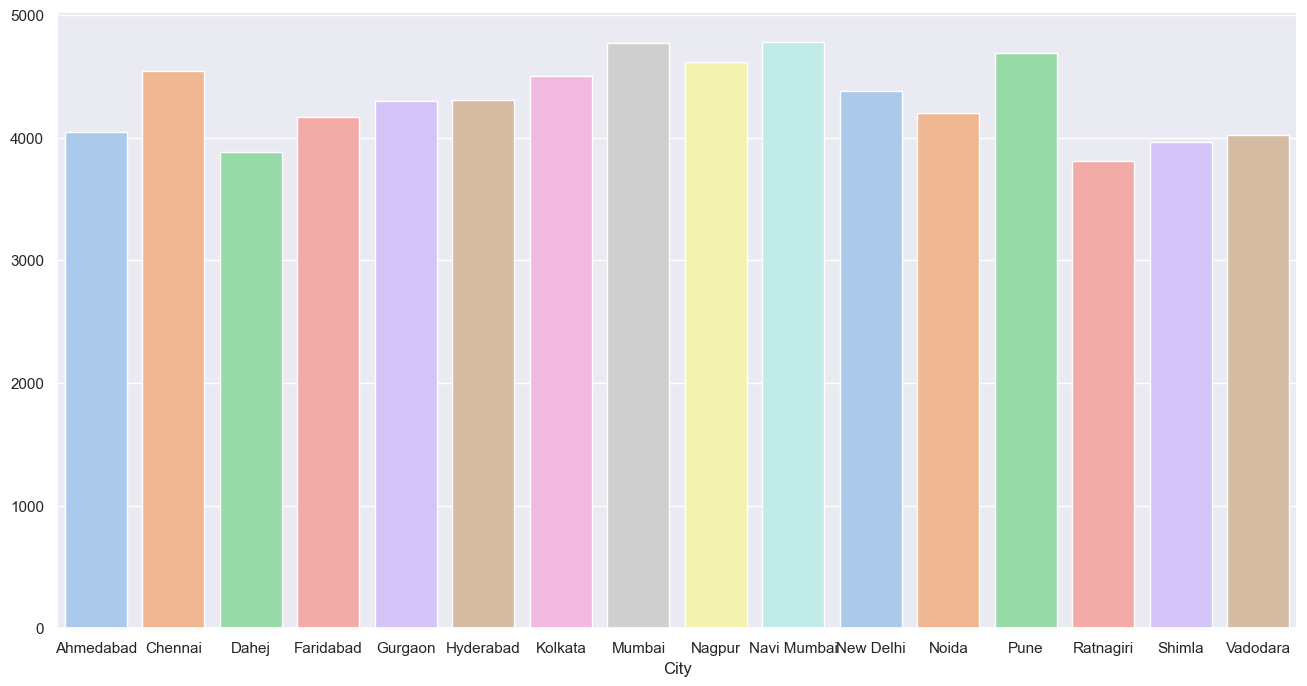

In [79]:
result = data.groupby('City').ElectricityBill.mean()
sns.set(rc={"figure.figsize":(16, 8)})
sns.barplot(x=result.index, y=result.values, palette="pastel")

In [80]:
# Looking for unique values in 'Company' feature

In [82]:
data['Company'].unique()

array(['Tata Power Company Ltd.', 'NHPC', 'Jyoti Structure',
       'Power Grid Corp', 'Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)',
       'Adani Power Ltd.', 'Kalpataru Power', 'Orient Green',
       'Sterlite Power Transmission Ltd',
       'Neueon Towers / Sujana Towers Ltd.', 'KEC International',
       'Indowind Energy', 'Unitech Power Transmission Ltd.',
       'Bonfiglioli Transmission Pvt. Ltd.', 'SJVN Ltd.',
       'Maha Transco  Maharashtra State Electricity Transmission Co, Ltd.',
       'L&T Transmission & Distribution', 'Guj Ind Power',
       'Torrent Power Ltd.', 'Reliance Energy', 'GE T&D India Limited',
       'NTPC Pvt. Ltd.',
       'Optibelt Power Transmission India Private Limited', 'CESC',
       'Ringfeder Power Transmission India Pvt. Ltd.', 'Reliance Power',
       'JSW Energy Ltd.', 'Sunil Hitech Eng',
       'Toshiba Transmission & Distribution Systems (India) Pvt. Ltd.',
       'Jaiprakash Power', 'TransRail Lighting', 'NLC India'],
      dtype=object)

<Axes: ylabel='Company'>

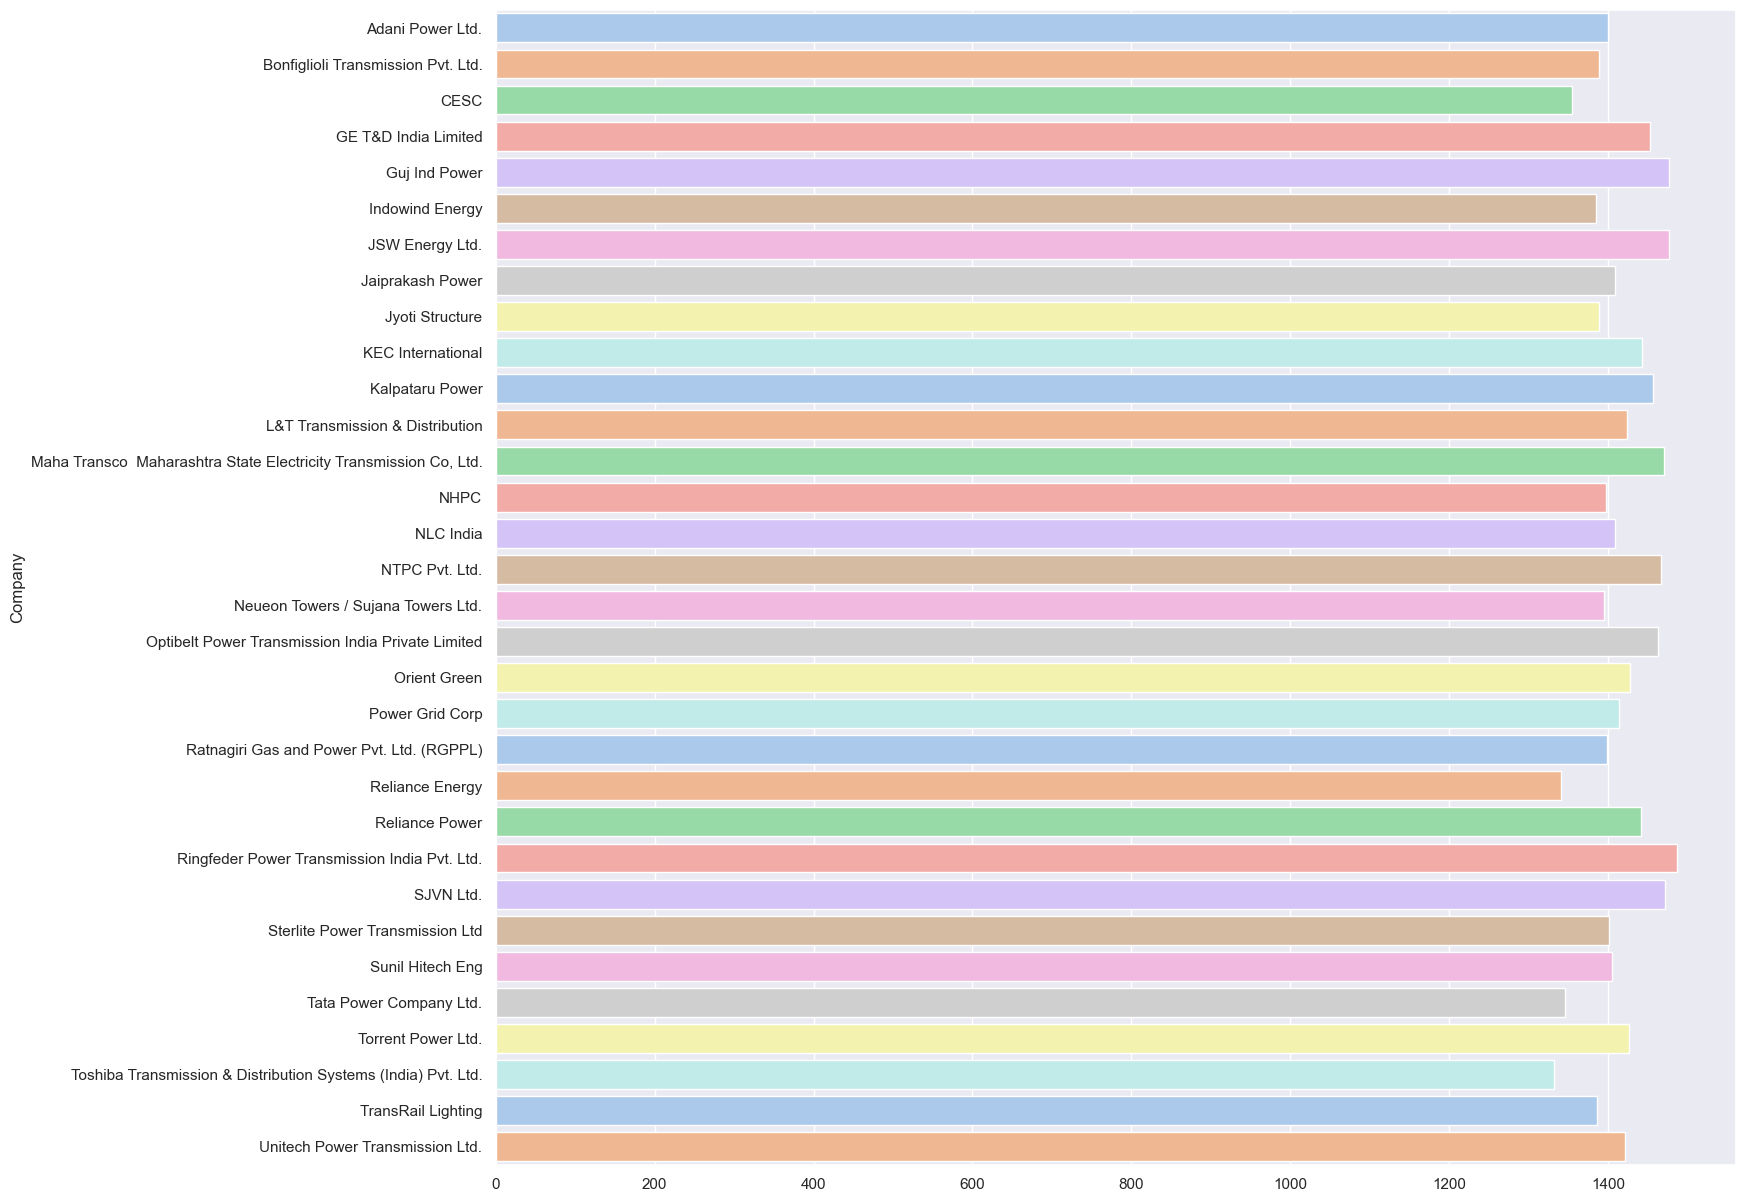

In [101]:
result = data.groupby('Company').Fan.count()
sns.set(rc={"figure.figsize":(16, 15)})
sns.barplot(x=result.values, y=result.index, palette="pastel")

In [95]:
# Company and City will go under categorical variable while others will go into numerical variable. 